In [1]:
import pandas as pd

from pathlib import Path

In [ ]:
# RootPath = Path(__file__).parent.parent
RootPath = Path(globals()['_dh'][0]).parent
DataPath = RootPath / "data" / "bench-time.csv"

In [3]:
df = pd.read_csv(DataPath)
# df.drop(columns=['MeanLB', 'MeanUB', 'Stddev', 'StddevLB', 'StddevUB'], inplace=True)

In [4]:
df = df.join(df['Name'].str.split('/', n=3, expand=True).rename(columns={0:'Module',1:'Function',2:'Variant',3:'Parameters'}))
df.drop(columns=['Name'], inplace=True)

In [5]:
df_thin = df.loc[df['Function'] == 'thin']
df_thin = df_thin.join(df_thin['Parameters'].str.extract(r'\[(\d+),(\d+)\]', expand=True).rename(columns={0:'Parameter0',1:'Parameter1'}))
df_thin = df_thin.drop(columns=['Parameters'])
df_thin['Parameter0'] = df_thin['Parameter0'].apply(int)
df_thin['Parameter1'] = df_thin['Parameter1'].apply(int)
df_thin['ParameterMin'] = df_thin[['Parameter0', 'Parameter1']].min(axis=1)
df_thin['ParameterMax'] = df_thin[['Parameter0', 'Parameter1']].max(axis=1)

Variant
Inductive    Axes(0.125,0.11;0.775x0.77)
Unsafe       Axes(0.125,0.11;0.775x0.77)
Name: Mean, dtype: object

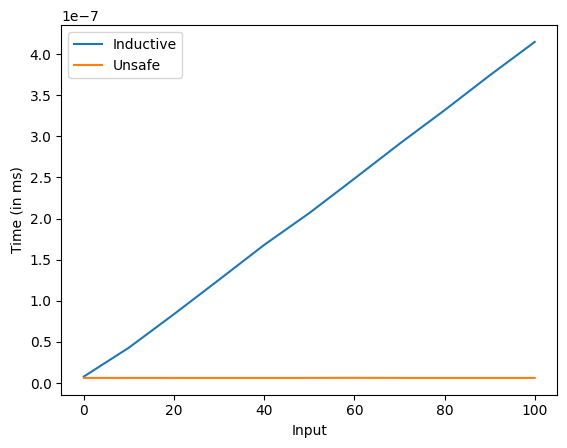

In [6]:
df_thin[df_thin['Parameter0'] == df_thin['Parameter1']].set_index('Parameter0').groupby('Variant')['Mean'].plot(legend=True, xlabel='Input', ylabel='Time (in ms)')

Variant
Inductive    Axes(0.125,0.11;0.775x0.77)
Unsafe       Axes(0.125,0.11;0.775x0.77)
Name: Mean, dtype: object

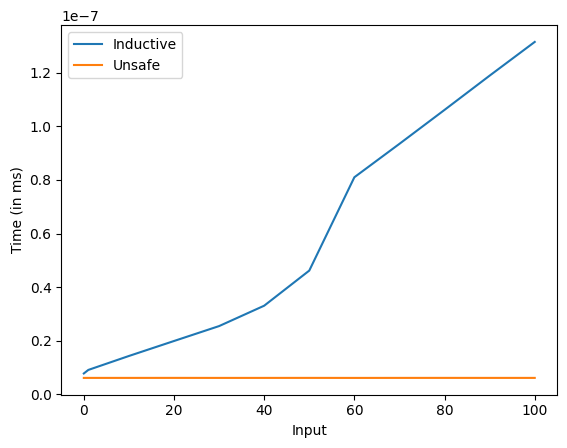

In [7]:
df_thin[df_thin['Parameter0'] == 0].set_index('Parameter1').sort_index().groupby('Variant')['Mean'].plot(legend=True, xlabel='Input', ylabel='Time (in ms)')

Variant
Inductive    Axes(0.125,0.11;0.775x0.77)
Unsafe       Axes(0.125,0.11;0.775x0.77)
Name: Mean, dtype: object

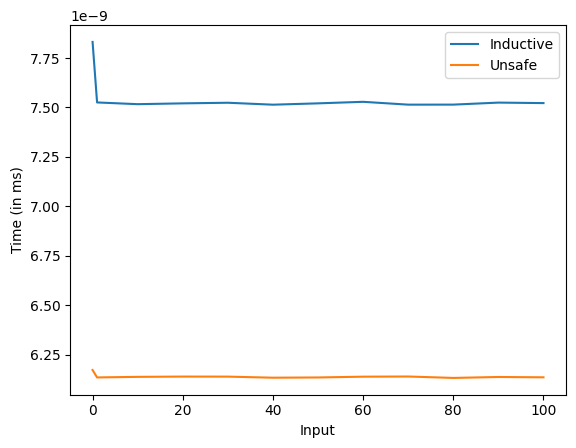

In [10]:
df_thin[df_thin['Parameter1'] == 0].set_index('Parameter0').sort_index().groupby('Variant')['Mean'].plot(legend=True, xlabel='Input', ylabel='Time (in ms)')

Variant
Inductive    Axes(0.125,0.11;0.775x0.77)
Unsafe       Axes(0.125,0.11;0.775x0.77)
Name: Mean, dtype: object

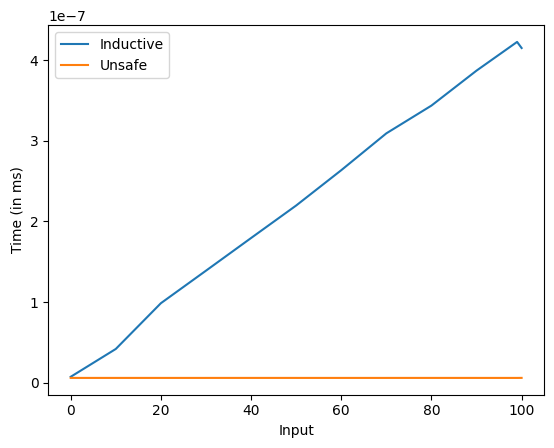

In [12]:
df_thin[df_thin['Parameter0'] == 100].set_index('Parameter1').sort_index().groupby('Variant')['Mean'].plot(legend=True, xlabel='Input', ylabel='Time (in ms)')

Variant
Inductive    Axes(0.125,0.11;0.775x0.77)
Unsafe       Axes(0.125,0.11;0.775x0.77)
Name: Mean, dtype: object

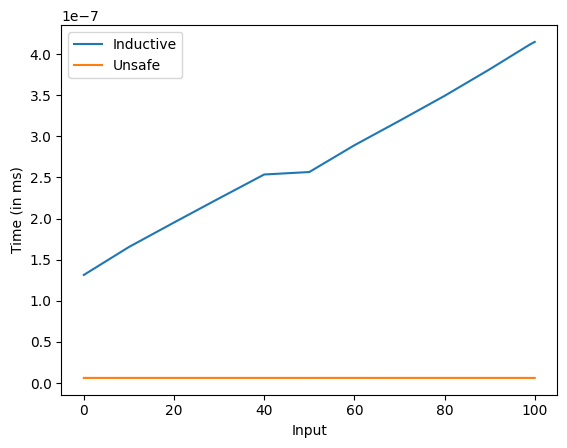

In [13]:
df_thin[df_thin['Parameter1'] == 100].set_index('Parameter0').sort_index().groupby('Variant')['Mean'].plot(legend=True, xlabel='Input', ylabel='Time (in ms)')